In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from math import sqrt
from datetime import datetime
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])
df = pd.read_csv('part-00000-0ccccdfd-e949-4450-86ac-882c7a743c73-c000.csv').head()

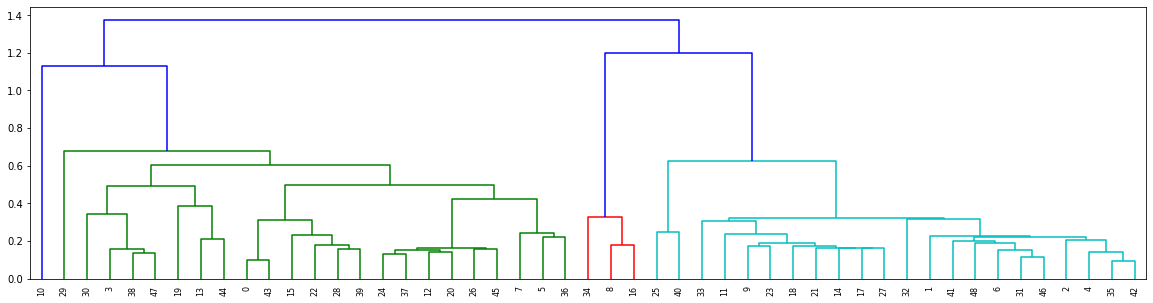

Cluster number 1 has 24 elements
['C-C264A45EA79A', 'C-C9F1E91019D0', 'C-CAE82B63E47F', 'C-CBA5422E458A', 'C-D1E3735BD02C', 'C-D69599E4BEB3', 'C-D7092660C225', 'C-D8CD4F9E4D72', 'C-DA3A4555EBA0', 'C-DB3A48479C05', 'C-DE592C95A8B0', 'C-DF0B6BBB1856', 'C-E22271573375', 'C-E367F2B8E450', 'C-E51659A647AB', 'C-E5B12A3B5F7D', 'C-EF36096B9DC0', 'C-EFAE1FD64F95', 'C-EFAE6835AEE1', 'C-F1C14FC88D4E', 'C-F69485A08318', 'C-F6E00EDD525C', 'C-F9DE18B58AF8', 'C-FBA611AED48E'] 

Cluster number 3 has 22 elements
['C-C702D197FA1D', 'C-C8214CC119AA', 'C-CA7A09A24ED9', 'C-CBA0FA5505AC', 'C-CF315977F78C', 'C-D1EA270C77BC', 'C-D7A120EB8D4B', 'C-D93BD6846B1D', 'C-D94E7B6FC0FB', 'C-DC1A39F98440', 'C-DF04ADA6A561', 'C-E18B60047DD8', 'C-E31012AAB957', 'C-E63A317ED0DA', 'C-E688E290C95D', 'C-E87DDC83F1CD', 'C-EBE3C53219E7', 'C-F3DEC3012D3E', 'C-F3FA6B6C43E4', 'C-F4F67ED3787C', 'C-FB92D5D1F617', 'C-FEAAA7345A22'] 

Cluster number 2 has 3 elements
['C-CCCF29EF1FF8', 'C-D91597D6C8A6', 'C-E9961CB25924'] 



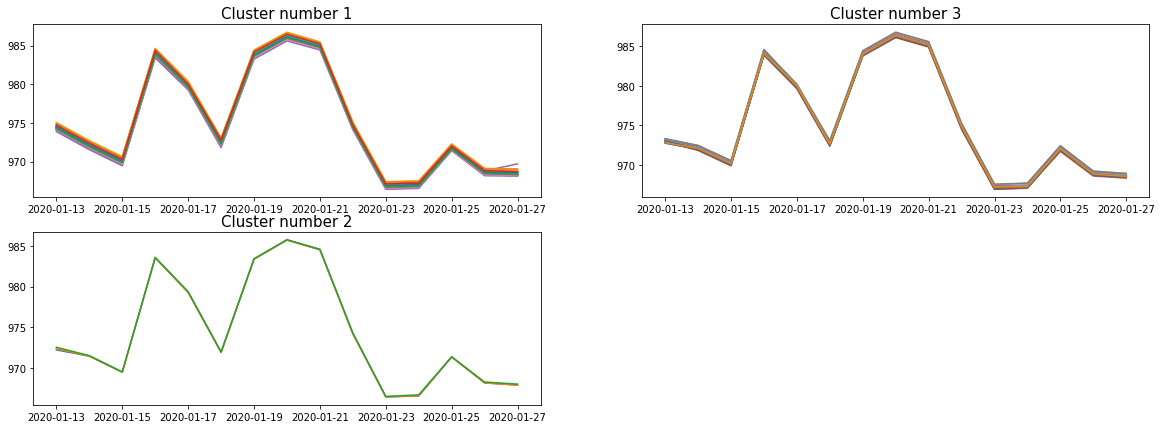

In [13]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from math import sqrt
import matplotlib.gridspec as gridspec
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings
def justify(a, invalid_val=0, axis=1, side='left'):    
    if invalid_val is np.nan:
        mask = ~np.isnan(a)
    else:
        mask = a!=invalid_val
    justified_mask = np.sort(mask,axis=axis)
    if (side=='up') | (side=='left'):
        justified_mask = np.flip(justified_mask,axis=axis)
    out = np.full(a.shape, invalid_val) 
    if axis==1:
        out[justified_mask] = a[mask]
    else:
        out.T[justified_mask.T] = a.T[mask.T]
    return out
df1 = pd.read_csv('part-00000-f461d698-6b24-4b4e-96a3-175eec59fe67-c000 (1).csv')
df1 = df1[(df1.alias_property_name == "Pressure")].drop(['stream_id', 'property_name', 'alias_property_name', 'asset_name', 'property_type'], axis=1).rename(columns={"shard_date": "date", "property_value": "pressure"})
df2 = pd.read_csv('asset_times.csv')
df3 = df1.merge(df2.drop(['asset_name'], axis=1), on='asset_external_id', how='inner')
df3 = df3[(df3.time >= df3.created_at)]
df3 = df3.drop_duplicates().drop(['time', 'created_at'], axis=1)
df3['date'] = pd.to_datetime(df3['date']).dt.date
df3 = df3.sort_values(by='date')
df3 = df3[(df3.asset_external_id != 'C-CFD86BE95805') & (df3.asset_external_id != 'C-FAEF6950F7A5')]
df3['pressure'] = pd.to_numeric(df3['pressure'])
df3 = df3.groupby(['date', 'asset_external_id']).agg({'pressure': 'mean'})
df3 = df3.pivot_table(index='asset_external_id', columns='date', values='pressure')
df3 = df3.dropna(axis=1)
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])
            
def plot_results(sequences, Z, cutOffLevel):    
    result = pd.Series(sch.fcluster(Z, cutOffLevel, criterion='maxclust'))
    clusters = result.unique()  
    fig = plt.subplots(figsize=(20, 7))  
    mimg = math.ceil(cutOffLevel/2.0)
    gs = gridspec.GridSpec(mimg,2, width_ratios=[1,1]) 
    for i, c in enumerate(clusters):
        clusterIndex = result[result==c].index
        print("Cluster number %d has %d elements" % (c, len(clusterIndex)))
        print(sequences.index[clusterIndex].tolist(), "\n")
        ax1 = plt.subplot(gs[i])
        ax1.plot(sequences.T.iloc[:,clusterIndex])
        ax1.set_title(('Cluster number '+str(c)), fontsize=15)  
    plt.show()

plt.figure(figsize=(20, 5))
Z = sch.linkage(df3, method='single', metric=DTWDistance)
sch.dendrogram(Z)
plt.show()
cut_off_level = 3
plot_results(df3, Z, cut_off_level)